## Steps:
* scrap blog using beautiful soup to create dataset to work on
* feature extraction using bag of words model
* determine category of article using knn clustering


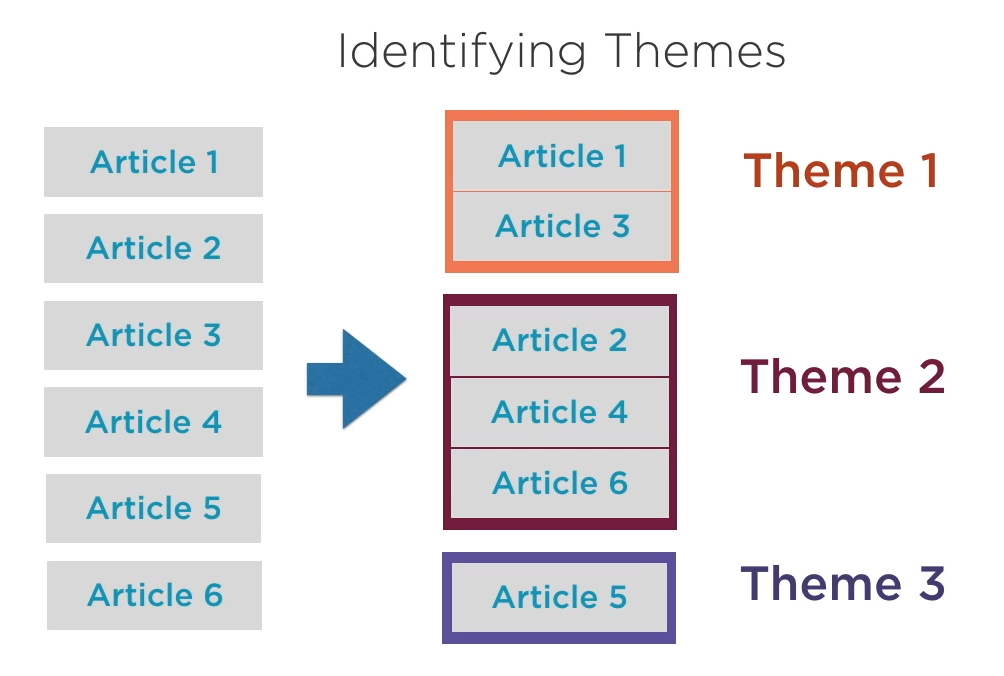

In [65]:
import urllib3
from bs4 import BeautifulSoup
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

In [66]:
url = 'https://doxydonkey.blogspot.com/'

def getData(url):
    pool = urllib3.PoolManager()
    req = pool.request('GET',url)
    resp = req.data
    soup = BeautifulSoup(resp)
    return soup

def getAllPosts(url, links):
    """
    get all blogpost articles
    iterate through pagination
    
    returns None
    """
    try:
        soup = getData(url)
#         print(soup)
        for i in soup.findAll('a'):
            try:
                url = i['href']
                title = i['title']
                if title == 'Older Posts':
#                     print(title, url)
                    links.append(url)
                    getAllPosts(url,links)
            except:
#                 pass
                title=''
    except:
        print('Exception...')
        
    return None


def getAllPostData(url):
    soup = getData(url)
    divs = soup.findAll('div',{'class','post-body'})
#     print(divs)
    posts = []
    for div in divs:
        posts+= map(lambda x: x.encode(encoding='ascii', errors='replace'), div.findAll('li'))
    return posts

In [ ]:
links, textData=[],[]
getAllPosts(url,links)
for link in links:
    textData+=getAllPostData(link)